In [6]:
import numpy as np # linear algebra
import pandas as pd
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf


In [7]:
####start#####
emotion_data = pd.read_csv('/content/drive/MyDrive/fer2013.csv')
X = []
y = []
#the column has values as training publictest and privtest
for index, row in emotion_data.iterrows():
        pixels = row['pixels'].split(" ")
        X.append(np.array(pixels))
        y.append(row['emotion'])

In [8]:
#convert to floats
X = np.array(X).astype(np.float)
y = np.array(y).astype(np.float)


#normalizing data between 0 and 1 so that each pixel value has a value between 0 and 1. (0-254->0-1)
X -= np.mean(X, axis=0)  
X /= np.std(X, axis=0)  


#reshaping inputs
X = X.reshape(X.shape[0], 48, 48, 1)
# #reshaping Y
# y_train= tf.keras.utils.to_categorical(y_train, num_classes=num_emotions)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_emotions)

In [9]:
ppc = 16
hog_images = []
hog_features = []
for image in X:
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

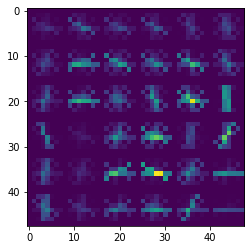

In [12]:
plt.imshow(hog_images[13])


In [ ]:
# ppc = 16
# hog_images_test = []
# hog_features_test = []
# for image in X_test:
#     fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
#     hog_images_test.append(hog_image)
#     hog_features_test.append(fd)

In [13]:
y =  y.reshape(len(y),1)


In [14]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,y))
np.random.shuffle(data_frame)

In [15]:
#What percentage of data you want to keep for training
percentage = 85 #close to actual split in the dataset which is 88.8
partition = int(len(hog_features)*percentage/100)

In [16]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()


In [17]:
clf.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred = clf.predict(x_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))


Accuracy: 0.5295319465081724
